In [ ]:
!python -m spacy download en_core_web_lg # Restart Runtime

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-27 13:44:38.807689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 13:44:40.759122: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 13:44:40.759266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install nltk
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment
    !pip install datatable
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=fd7820c84b177d51d60f4807a4b08bd9735ec7f42a51ff381b981680172db04f
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 KB 27.4 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 1.9.1
    Uninstalling multimethod-1.9.1:
      Successfully uninstalled mu

In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
import pandas as pd
from collections import Counter
from random import seed

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import nltk 
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
nltk.download('stopwords')
from nltk.corpus import stopwords


/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the data
%cd /content/drive/MyDrive/Colab_Notebooks
df_example = pd.read_csv('20191226-reviews.csv')


/content/drive/MyDrive/Colab_Notebooks


In [ ]:
# Delete empty data
df_example['body'].replace('', np.nan, inplace=True)
df_example['body'].dropna(inplace=True)

In [ ]:
# Install langdetect to eliminate non english reviews
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e139514adb382ce9dcffccde50cbf0c9b95d52614450296cb29141700ca3e169
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
# Create function to eliminate non english reviews
from langdetect import detect

def detect_english(text):
  try:
      return detect(text) == 'en'
  except:
      return False

In [ ]:
# Apply previous function to our data
df_example = df_example[df_example['body'].apply(detect_english)]

In [ ]:
df_example

asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0                            Def not best, but not worst   
1                            Text Messaging Doesn't Work   
2                                        Love This Phone   
3                                Love the Phone, BUT...!   
4           Great phone service and options, lousy case!   
...                                                  ...   
67981  Awesome Phone, but finger scanner is a big mis...   
67982                                    Simply Amazing!   
67983  great phon3, but many bugs need to fix. still ...   
67984                                  Phone is like new   
67985                    Outstanding phone for the price   

                                                    body  helpfulVotes  
0      I had the Samsung A600 for awhile which is abs...           1.0  
1      Due to a software issue between Nokia and Spri...          17.0  
2      This is a great, reliable phone. I also purcha...           5.0  
3      I love the phone and all, because I really did...           1.0  
4      The phone has been great for every purpose it ...           1.0  
...                                                  ...           ...  
67981  I love the camera on this phone. The screen is...           1.0  
67982  I've been an Xperia user for several years and...           1.0  
67983                         buy one more for my cousin           NaN  
67984  Product looks and works like new. Very much re...           NaN  
67985  I love the size and style of this phone. It is...           NaN  

[59815 rows x 8 columns]

In [ ]:
df_example['review']=df_example['body']

In [ ]:
# Save in a new variable all not null data
df_new=[]
df_new = df_example[df_example['review'].notnull()]

In [ ]:
# Calculate the number of words per review
df_new["Numero de palabras"] = df_new["review"].apply(lambda n: len(n.split()))
df_new.to_csv('Electronics_processed.csv')

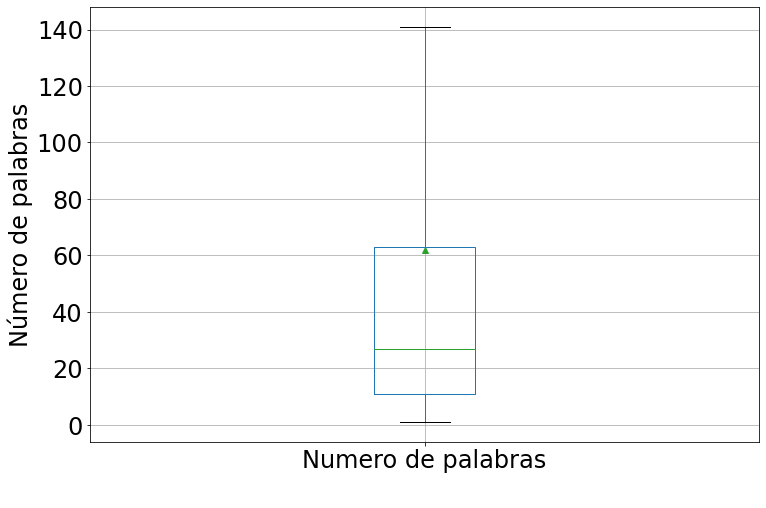

In [ ]:
# Boxplot number of words per review
ax1 = df_new.boxplot(column="Numero de palabras", figsize=(12,8), showmeans=True, showfliers=False,fontsize=24) #delete outliers
ax1.set_ylabel('Número de palabras', fontsize=24)
ax1.set_xlabel(' ', fontsize=24)
plt.show() 


In [ ]:
# Describe the obtained information
df_new['Numero de palabras'].describe()

count    59815.000000
mean        61.821851
std        125.890488
min          1.000000
25%         11.000000
50%         27.000000
75%         63.000000
max       5345.000000
Name: Numero de palabras, dtype: float64

In [ ]:
# Group the reviews by date
df_group_date=df_new.groupby(["date"])["body"].count().reset_index(name="count")
df_group_date 
# Save the information to csv
df_group_date.to_csv('Electronics_fechas_2.csv')

In [ ]:
# Define the stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Add more stop words that apply to this dataset
stop_words.extend(['not','amp','bit','like', 'phone', 'de', 'el', 'la', 'que', 'en', 'es', 'muy', 'lo', 'con', 'un', 'etc', 'T', 't', 'star', 'five', 'ðÿ', 'at'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lemmatization, elimination of stop words and normalization process
def lemma_words(text):
    lemmas = []
    doc= nlp(text)
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    lemmas= [i for i in lemmas if len(i) > 1]
    lemmas=[word for word in lemmas if word not in stop_words]
    lemmas=' '.join(lemmas)
    lemmas= lemmas.lower()
    return lemmas

df_new['lemmas'] = df_new['review'].apply(lemma_words)

In [ ]:
# Save the lemmas in csv for later use
df_new['lemmas'].to_csv('Lemmas_Electronics_2.csv')

In [ ]:
# Save the dataset to csv
df_new.to_csv('Electronics_complete_2.csv')

# Wordcloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 7))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(' '.join(df_new['lemmas']))

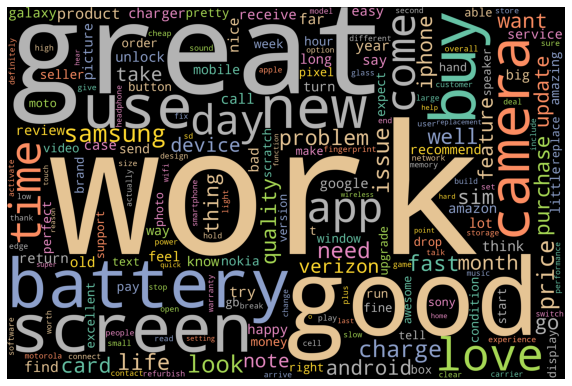

In [ ]:
plot_cloud(wordcloud) 


# Unigramas, Bigramas, Trigramas

In [ ]:
# Load processed data
df_new = pd.read_csv('Electronics_complete_2.csv')
dft= df_new['lemmas']
dft = [x for x in dft if str(x) != 'nan']
print(dft)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
### Function to calculate the TF-IDF of Unigrams
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dft)
names=tfIdfVectorizer.get_feature_names_out()
freqs = tfIdf.sum(axis=0).A1
result = dict(zip(names, freqs))
print(result)

{'00': 63.50397299299902, '000': 21.448325763261476, '00000': 0.2181476844965958, '000000': 0.17710502047452162, '0000001': 0.13358289196962944, '0000th': 0.208333005678009, '000amper': 0.5501089073143984, '000mah': 0.5910561608390801, '0011': 0.23492584876272093, '003395': 0.037594184884280256, '0051': 0.09317324781419263, '007': 0.0656158347850136, '00am': 0.5972437400868188, '00pm': 1.2011620182276728, '00pn': 0.3623566909433011, '01': 8.850779829080176, '0105': 0.32369492309390474, '01283712983712': 0.22895488619674703, '015': 0.5054354427466359, '01cents': 0.2381784108531177, '01d0': 0.10222258259495297, '02': 2.797866464244828, '0204': 0.6910835335059691, '022': 0.020171288133534623, '02733p4': 0.0853921198032266, '02736c7': 0.0853921198032266, '03': 1.3113499194873244, '03pm': 0.07061477500158576, '04': 0.8026222649591901, '0400': 0.07017717110576645, '0420': 0.07017717110576645, '04754bbx2bt8deb8yb50': 0.21477014703485467, '04p8gfgn8k0bmxz9mn2f': 0.10483042001379449, '05': 1.16

In [ ]:
# Obtain the first 30 most relevant words in the TF-IDF
from operator import itemgetter
i = 0
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)

great 3307.029982296701
good 2648.8100619893457
work 2537.0840204570973
love 2221.2775110622456
battery 1525.9924011708372
buy 1489.927238310715
new 1451.4122909518271
price 1259.3967418617283
screen 1254.9097572534172
use 1145.2788271390982
product 1027.3537791496374
come 1024.8036911884242
camera 1005.5973846084454
get 940.928352574458
time 924.6704251361876
look 888.4164402946018
fast 883.9402309603261
nice 846.0138141041365
charge 839.3702062756547
day 832.8022781348704
problem 825.5308511362467
perfect 824.3268756743443
life 818.2165638992764
purchase 790.9733293457671
issue 757.0631139784791
samsung 754.7625218401713
far 753.740915787437
happy 752.1037586776474
month 745.3207581015635
need 731.817529384009


Text(0.5, 1.0, 'Unigramas más relevantes del corpus')

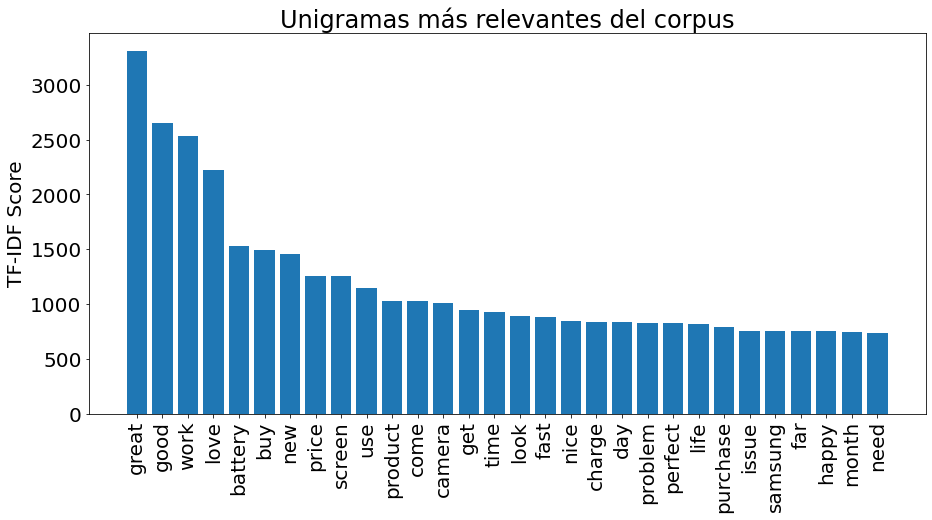

In [ ]:
# Plot the most relevant unigrams
df_results=pd.DataFrame.from_dict(results_sorted).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results[0],df_results[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Unigramas más relevantes del corpus')

In [ ]:
### Function to calculate the TF-IDF of bigrams
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

In [ ]:
# Obtain the first 30 most relevant words in the TF-IDF
from operator import itemgetter
i = 0
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted_bi:
    i += 1
    if i == 31:
      break
    print(key, value)

work great 538.8827548405495
battery life 456.8816264498368
sim card 295.8771843945012
brand new 283.65514948232243
great price 256.40957390215135
good price 197.964080796157
work perfectly 197.71884449459517
good product 168.86697787785596
work fine 163.28180419613685
easy use 161.5704112258337
great product 150.05612428092957
stop work 126.85872112798725
far good 118.48114471201077
great condition 117.30309634897176
look brand 109.9308716922351
great great 109.75648894236566
perfect condition 109.46652631803359
good condition 109.14694804719237
work good 108.8677119868463
happy purchase 108.26130344335706
look new 106.97551375892154
love new 106.0380570384199
sd card 105.9191815119048
great battery 103.76757739467125
good quality 101.16861102893415
highly recommend 101.11207332981147
good battery 99.21625635319727
samsung galaxy 98.54445523015615
great camera 94.79970130809807
screen protector 92.80971423583624


Text(0.5, 1.0, 'Bigramas más relevantes del corpus')

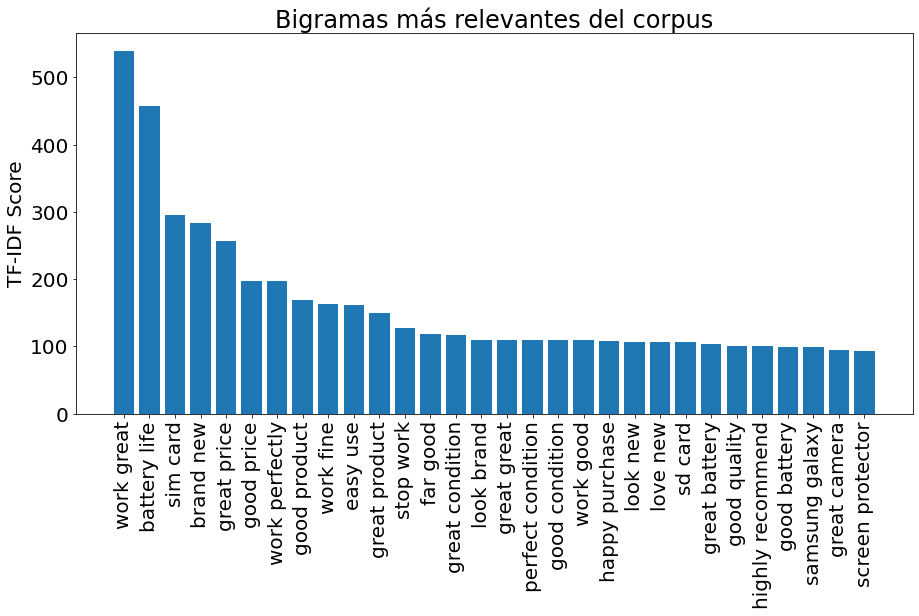

In [ ]:
# Plot the most relevant bigrams
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus')

In [ ]:
# Obtain the first 30 most relevant words in the TF-IDF
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

In [ ]:
# We will then obtain the first 30 most popular words in the TF-IDF####
from operator import itemgetter
i = 0
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted_tri:
    i += 1
    if i == 31:
      break
    print(key, value)

look brand new 95.58487515719608
great battery life 64.39816184583621
great great price 63.80878465907404
good battery life 62.70465019636044
battery life good 58.27626396241363
battery life great 49.76652200379222
long battery life 37.27418876285364
sim card work 33.07035124789078
battery last day 31.45104957512019
love work great 29.88520927518791
brand new work 29.74183237508884
stop work month 27.6746815937381
work great far 26.89119937195874
new work great 26.086550378024366
battery life amazing 23.635258815665722
come sim card 23.282925981993724
finger print reader 22.701207985195932
work great problem 22.457872746615696
battery hold charge 22.27073841362551
great value money 21.652182803623713
new sim card 21.62807429410163
good value money 21.10004931948236
work brand new 20.876588949831024
love love love 20.829347196718352
micro sd card 20.55846271429617
condition work great 19.837310306122802
take great picture 19.48971351127786
battery life well 19.02110440454328
love batter

Text(0.5, 1.0, 'Trigramas más relevantes del corpus')

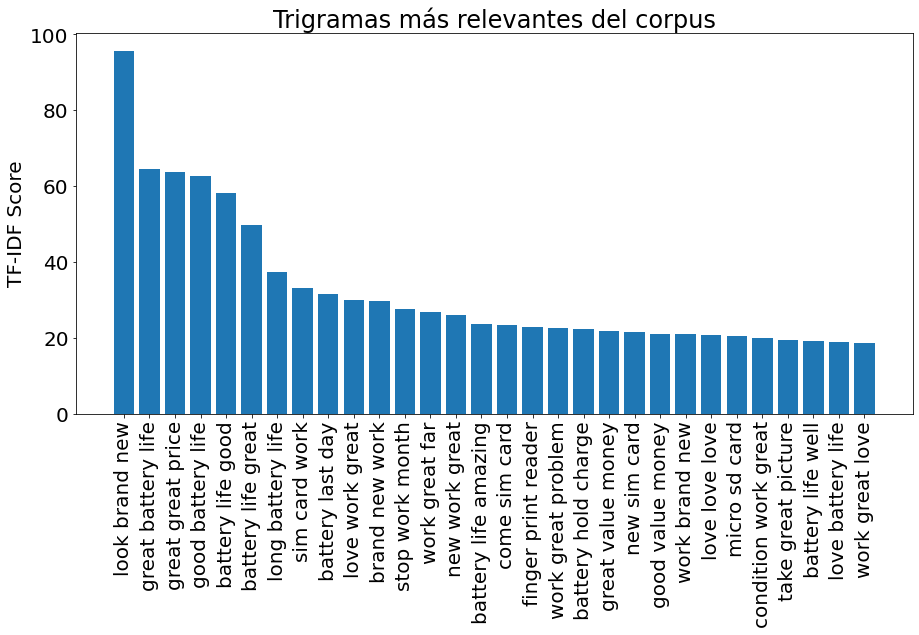

In [ ]:
# Plot the most relevant trigrams
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus')

# Modelado de tópicos

In [ ]:
# Load the data
df_model = pd.read_csv('Lemmas_Electronics_2.csv')
print(df_model.head())

   Unnamed: 0                                             lemmas
0           0  samsung a600 awhile absolute doo doo read revi...
1           1  software issue nokia sprint text messaging cap...
2           2  great reliable purchase samsung a460 die menu ...
3           3  love need expect price bill receive little mon...
4           4  great purpose offer day buy case case picture ...


In [ ]:
# Tokenize the data
def tokenize(text):
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    return tokens

# Apply tokenizer
df_model['tokens'] = df_model['lemmas'].apply(tokenize)
print(df_model.head())

   Unnamed: 0                                             lemmas  \
0           0  samsung a600 awhile absolute doo doo read revi...   
1           1  software issue nokia sprint text messaging cap...   
2           2  great reliable purchase samsung a460 die menu ...   
3           3  love need expect price bill receive little mon...   
4           4  great purpose offer day buy case case picture ...   

                                              tokens  
0  [samsung, a600, awhile, absolute, doo, doo, re...  
1  [software, issue, nokia, sprint, text, messagi...  
2  [great, reliable, purchase, samsung, a460, die...  
3  [love, need, expect, price, bill, receive, lit...  
4  [great, purpose, offer, day, buy, case, case, ...  


In [ ]:
#Importing seed for reproducibility
seed(24)
# Create a dictionary of words for topic modeling
id2word = Dictionary(df_model['tokens'])

In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.95)#100000

In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df_model['tokens']]

In [ ]:
# Finding optimal k (Numer of topics)
# PLEASE TAKE INTO COSNDIERATION THAT THIS MDOEL TAKES A LONG TIME 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
# This is to apply the above function which may take a long time 
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df_model['tokens'],
                                                        start=2, limit=16, step=1) #Compute from 2 to 15 yopics to find the optimum

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Obtain the values of the coherence score
coherence_values_topic_df = pd.DataFrame(coherence_values_topic) 

# Save the data as csv
coherence_values_topic_df.to_csv('EL_coherence_values_2.csv', index=False)

#coherence_values_topic_df= pd.read_csv('coherence_values.csv', index_col=False) #In case we want to load pre-calculated data
coherence_values_topic_df

0
0   0.422650
1   0.422567
2   0.421478
3   0.467143
4   0.444081
5   0.453133
6   0.450936
7   0.468658
8   0.479746
9   0.476276
10  0.480275
11  0.452759
12  0.477165
13  0.479310

In [ ]:
coherence_values_topic_df=coherence_values_topic_df.iloc[:, 0].tolist()

In [ ]:
coherence_values_topic_df

[0.42265044897533854,
 0.4225667887101481,
 0.4214777216788987,
 0.46714272351687836,
 0.44408126995618086,
 0.4531328927208458,
 0.4509357626767878,
 0.46865832419713715,
 0.47974582421201983,
 0.4762762330290953,
 0.48027533176989534,
 0.4527594859063966,
 0.47716521270329487,
 0.47931022544965446]

Text(0, 0.5, 'Índice de coherencia')

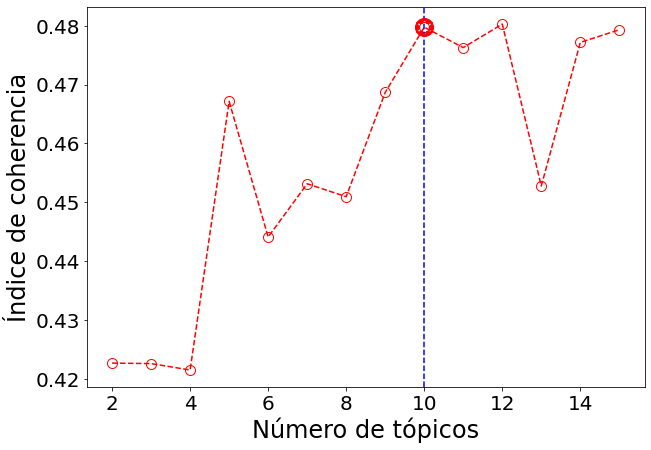

In [ ]:
# PLot to compare the values of the coherence score for each topic
import matplotlib.path as mpath
coherence_values_topic_df= pd.read_csv('EL_coherence_values_2.csv', index_col=False)
plt.figure(figsize=(10,7))
estrella = mpath.Path.unit_regular_star(6)
circulo = mpath.Path.unit_circle()
verts = np.concatenate([circulo.vertices, estrella.vertices[::-1, ...]])
codes = np.concatenate([circulo.codes, estrella.codes])
cut_star = mpath.Path(verts, codes)
plt.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15],coherence_values_topic_df, '--r', marker="o", markersize=10, fillstyle='none')
plt.axvline(x=10, color='b', linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(10, 0.4797 , '--r', marker=cut_star, markersize=18)
plt.xlabel('Número de tópicos', fontsize=24)
plt.ylabel('Índice de coherencia', fontsize=24)

In [ ]:
# Compute model for k=5
k=5
# LDA model 
model_k5 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Compute Coherence Score 
coherence_model_k5 = CoherenceModel(model=model_k5, texts=df_model['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k5 = coherence_model_k5.get_coherence()
print('\nCoherence Score: ', coherence_model_k5)


Coherence Score:  0.43668226642494645


In [ ]:
#Save the computed model or load a previously computed one
#model_k5.save("model5_topics_El.model") 
model_k5 = LdaMulticore.load("model5_topics_El.model")

/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Print the Keyword in the 10 topics
print(model_k5.print_topics())
doc_lda = model_k5[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k5.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.022*"good" + 0.012*"battery" + 0.012*"gb" + 0.010*"price" + 0.010*"fingerprint" + 0.010*"pixel" + 0.008*"camera" + 0.008*"device" + 0.007*"quality" + 0.007*"android"'), (1, '0.025*"great" + 0.024*"camera" + 0.023*"good" + 0.022*"screen" + 0.017*"battery" + 0.012*"price" + 0.011*"fast" + 0.011*"well" + 0.010*"life" + 0.010*"love"'), (2, '0.019*"app" + 0.016*"use" + 0.009*"time" + 0.008*"screen" + 0.008*"work" + 0.007*"want" + 0.007*"need" + 0.006*"nokia" + 0.006*"thing" + 0.006*"good"'), (3, '0.026*"work" + 0.021*"sim" + 0.016*"card" + 0.014*"verizon" + 0.013*"unlock" + 0.011*"buy" + 0.010*"mobile" + 0.010*"samsung" + 0.009*"service" + 0.009*"use"'), (4, '0.033*"work" + 0.026*"great" + 0.024*"new" + 0.023*"buy" + 0.017*"battery" + 0.015*"charge" + 0.015*"come" + 0.014*"good" + 0.014*"love" + 0.012*"screen"')]
------ Topic 0 ------
good battery gb price fingerprint pixel camera device quality android

------ Topic 1 ------
great camera good screen battery price fast well life lov

In [ ]:
# Plot intertopic distance map
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k5, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.033837 -0.066846       1        1  26.232328
1      0.111757  0.066441       2        1  22.615727
4     -0.122131  0.132859       3        1  20.823446
3     -0.166458 -0.096955       4        1  17.878497
0      0.142995 -0.035499       5        1  12.450003, topic_info=        Term          Freq         Total Category  logprob  loglift
546      sim   5841.000000   5841.000000  Default  30.0000  30.0000
113     work  21999.000000  21999.000000  Default  29.0000  29.0000
319   camera  11669.000000  11669.000000  Default  28.0000  28.0000
53       new  10972.000000  10972.000000  Default  27.0000  27.0000
38     great  19754.000000  19754.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1923     app   1136.973192   9490.488342   Topic5  -5.0862  -0.0385
31      fast    938.652630   6614.374631   Topic5  -5.2779   0.1309
84    screen   1139.321914  15634.121334   Topic5  -5.0842  -0.5356
169     need    887.100753   6744.083698   Topic5  -5.3344   0.0550
207      day    857.851326   8938.966169   Topic5  -5.3679  -0.2603

[459 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
4653       1  0.002203      128
4653       2  0.070502      128
4653       3  0.002203      128
4653       4  0.011016      128
4653       5  0.916524      128
...      ...       ...      ...
12409      2  0.961541      xzs
7914       2  0.992440       z3
12147      2  0.973001       z4
12147      5  0.014742       z4
10265      2  0.987620  zenfone

[1258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 4, 1])

In [ ]:
# Compute model for k=10
k=10
# LDA model 
model_k10 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Compute Coherence Score 
coherence_model_k10 = CoherenceModel(model=model_k10, texts=df_model['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k10 = coherence_model_k10.get_coherence()
print('\nCoherence Score: ', coherence_model_k10)


Coherence Score:  0.4426537921815261


In [ ]:
#Save the computed model or load a previously computed one
model_k10.save("model10_topics_El.model") 
#model_k8_load=LdaMulticore.load("model4_topics.model")

/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Print the Keyword in the 11 topics
print(model_k10.print_topics())
doc_lda = model_k10[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k10.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.028*"battery" + 0.019*"fingerprint" + 0.017*"good" + 0.014*"life" + 0.011*"camera" + 0.011*"device" + 0.011*"fast" + 0.010*"price" + 0.010*"day" + 0.010*"charge"'), (1, '0.036*"camera" + 0.021*"screen" + 0.016*"sony" + 0.013*"good" + 0.010*"great" + 0.010*"well" + 0.010*"android" + 0.009*"look" + 0.009*"feel" + 0.009*"note"'), (2, '0.027*"use" + 0.013*"moto" + 0.012*"good" + 0.012*"work" + 0.010*"text" + 0.009*"great" + 0.009*"call" + 0.008*"battery" + 0.008*"camera" + 0.008*"need"'), (3, '0.033*"work" + 0.020*"verizon" + 0.018*"unlock" + 0.014*"mobile" + 0.013*"service" + 0.012*"network" + 0.012*"buy" + 0.012*"at&t" + 0.011*"carrier" + 0.010*"say"'), (4, '0.025*"work" + 0.021*"buy" + 0.020*"charge" + 0.017*"month" + 0.017*"battery" + 0.015*"day" + 0.014*"time" + 0.012*"screen" + 0.012*"issue" + 0.012*"get"'), (5, '0.081*"great" + 0.061*"good" + 0.042*"work" + 0.031*"price" + 0.028*"new" + 0.024*"battery" + 0.018*"come" + 0.017*"look" + 0.016*"fast" + 0.015*"product"'), (6, '0.

In [ ]:
# Plot intertopic distance map  
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k10, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.057691 -0.122855       1        1  15.368707
4     -0.148717 -0.020226       2        1  14.440353
3     -0.220030 -0.083614       3        1  11.113893
5     -0.029202  0.245494       4        1   9.752478
2      0.049578 -0.081024       5        1   9.422362
1      0.158629  0.003348       6        1   9.066511
7     -0.003300  0.087649       7        1   8.659744
0      0.156254  0.004457       8        1   8.104786
9      0.091513 -0.038276       9        1   7.692890
8     -0.112417  0.005048      10        1   6.378276, topic_info=        Term          Freq         Total Category  logprob  loglift
194     love  10822.000000  10822.000000  Default  30.0000  30.0000
38     great  19128.000000  19128.000000  Default  29.0000  29.0000
551     card   5903.000000   5903.000000  Default  28.0000  28.0000
546      sim   6005.000000   6005.000000  Default  27.0000  27.0000
37      good  19141.000000  19141.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
211      get    582.663819   9146.118982  Topic10  -5.0859  -0.0012
83   samsung    566.748062   8140.900082  Topic10  -5.1136   0.0875
113     work    667.469735  21201.864895  Topic10  -4.9501  -0.7061
99      take    468.154075   5222.984394  Topic10  -5.3047   0.3402
225  charger    453.838327   3839.483485  Topic10  -5.3358   0.6169

[866 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5424      1  0.952062    -no
5424      5  0.010128    -no
5424      8  0.030385    -no
7728      4  0.842833  10/10
7728      6  0.138548  10/10
...     ...       ...    ...
3103      6  0.649432   zoom
3103      7  0.002848   zoom
3103      8  0.022787   zoom
3103      9  0.031332   zoom
3103     10  0.002848   zoom

[3387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 6, 3, 2, 8, 1, 10, 9])

In [ ]:
# Compute model for k=12
k=12
# LDA model 
model_k12 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Compute Coherence Score 
coherence_model_k12 = CoherenceModel(model=model_k12, texts=df_model['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k12 = coherence_model_k12.get_coherence()
print('\nCoherence Score: ', coherence_model_k12)


Coherence Score:  0.44857856260038936


In [ ]:
#model_k12.save("model12_topics_El.model") 
model_k12=LdaMulticore.load("model12_topics_El.model")

/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Print the Keyword in the 11 topics
print(model_k12.print_topics())
doc_lda = model_k12[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k12.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.032*"sony" + 0.019*"device" + 0.015*"xperia" + 0.012*"s8" + 0.012*"display" + 0.012*"camera" + 0.012*"samsung" + 0.012*"xiaomi" + 0.009*"screen" + 0.009*"galaxy"'), (1, '0.028*"screen" + 0.025*"fingerprint" + 0.019*"camera" + 0.017*"note" + 0.012*"battery" + 0.011*"reader" + 0.010*"fast" + 0.010*"finger" + 0.009*"face" + 0.009*"feel"'), (2, '0.020*"use" + 0.011*"text" + 0.010*"call" + 0.009*"work" + 0.008*"time" + 0.007*"app" + 0.007*"feature" + 0.006*"message" + 0.006*"good" + 0.006*"need"'), (3, '0.033*"work" + 0.022*"verizon" + 0.020*"unlock" + 0.015*"mobile" + 0.014*"service" + 0.013*"network" + 0.013*"at&t" + 0.012*"buy" + 0.012*"carrier" + 0.010*"say"'), (4, '0.026*"work" + 0.021*"buy" + 0.018*"charge" + 0.018*"month" + 0.015*"day" + 0.015*"time" + 0.013*"issue" + 0.013*"screen" + 0.013*"get" + 0.013*"problem"'), (5, '0.080*"good" + 0.061*"battery" + 0.034*"price" + 0.034*"life" + 0.032*"great" + 0.027*"camera" + 0.019*"quality" + 0.016*"day" + 0.014*"fast" + 0.012*"amazi

In [ ]:
# Plot intertopic distance map
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k12, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.110721 -0.092250       1        1  14.590772
4      0.138715 -0.084408       2        1  13.237919
2     -0.054174 -0.123013       3        1  10.614970
3      0.187659 -0.140238       4        1   9.812318
5     -0.081552  0.148979       5        1   8.931461
9     -0.106922 -0.043264       6        1   7.343345
7     -0.003733  0.009674       7        1   7.271561
11     0.102797  0.200217       8        1   7.133231
1     -0.148566  0.016520       9        1   6.889725
10     0.149348  0.146463      10        1   5.003274
8      0.110542 -0.062558      11        1   4.984898
0     -0.183392  0.023878      12        1   4.186525, topic_info=         Term          Freq         Total Category  logprob  loglift
38      great  19075.000000  19075.000000  Default  30.0000  30.0000
194      love  10897.000000  10897.000000  Default  29.0000  29.0000
546       sim   5746.000000   5746.000000  Default  28.0000  28.0000
551      card   5630.000000   5630.000000  Default  27.0000  27.0000
37       good  18822.000000  18822.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
302   quality    360.810723   5896.581539  Topic12  -5.1442   0.3795
37       good    390.158754  18822.851047  Topic12  -5.0660  -0.7030
1307  android    263.598715   5853.153849  Topic12  -5.4581   0.0730
1154       gb    249.615919   2786.107981  Topic12  -5.5126   0.7608
166   feature    250.122558   5510.304902  Topic12  -5.5106   0.0809

[1020 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
8229       3  0.945933     -fast
6284       3  0.974603     -good
5424       1  0.059279       -no
5424       3  0.938579       -no
3729      10  0.950740       .it
...      ...       ...       ...
7914       5  0.962986        z3
11859      9  0.018627        z5
11859     12  0.968592        z5
11455     11  0.950451       zen
12149     10  0.900604  zenphone

[4454 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 4, 6, 10, 8, 12, 2, 11, 9, 1])

In [ ]:
model_k12.print_topics()

[(0,
  '0.033*"good" + 0.029*"camera" + 0.016*"screen" + 0.015*"quality" + 0.012*"price" + 0.011*"fingerprint" + 0.008*"well" + 0.008*"sony" + 0.007*"battery" + 0.007*"display"'),
 (1,
  '0.046*"new" + 0.026*"come" + 0.022*"work" + 0.019*"good" + 0.018*"look" + 0.017*"brand" + 0.015*"condition" + 0.014*"product" + 0.014*"purchase" + 0.014*"great"'),
 (2,
  '0.034*"work" + 0.019*"verizon" + 0.017*"sim" + 0.016*"unlock" + 0.013*"mobile" + 0.012*"call" + 0.012*"network" + 0.012*"card" + 0.012*"service" + 0.011*"at&t"'),
 (3,
  '0.091*"great" + 0.037*"love" + 0.031*"work" + 0.027*"price" + 0.026*"good" + 0.023*"card" + 0.021*"buy" + 0.017*"sim" + 0.015*"nice" + 0.014*"fast"'),
 (4,
  '0.023*"buy" + 0.022*"work" + 0.018*"charge" + 0.016*"screen" + 0.016*"month" + 0.013*"time" + 0.012*"get" + 0.012*"day" + 0.011*"battery" + 0.011*"return"'),
 (5,
  '0.053*"battery" + 0.027*"life" + 0.018*"day" + 0.016*"screen" + 0.014*"charge" + 0.013*"use" + 0.012*"note" + 0.012*"samsung" + 0.011*"love" + 0

In [ ]:
# Obtain each topic's importance in the corpus
def document_to_lda_features(model_k5,document):
  topic_importance=np.array(model_k5.get_document_topics(document, minimum_probability=0))
  return topic_importance[:,1]
# See which topic is predominant in each review
df_model['lda_features']=list(map(lambda doc: document_to_lda_features(model_k5,doc), corpus))

In [ ]:
# Tokenize the data
def topic_important(item_score):
    score=np.argmax(item_score, axis=0)
    return score

# Apply tokenizer
df_model['topic_dominant'] = df_model['lda_features'].apply(topic_important)
df_model

Unnamed: 0                                             lemmas  \
0               0  samsung a600 awhile absolute doo doo read revi...   
1               1  software issue nokia sprint text messaging cap...   
2               2  great reliable purchase samsung a460 die menu ...   
3               3  love need expect price bill receive little mon...   
4               4  great purpose offer day buy case case picture ...   
...           ...                                                ...   
59810       67981  love camera screen huge 4k color vibrant proce...   
59811       67982  xperia user year sony come long way ugly notch...   
59812       67983                                         buy cousin   
59813       67984                    product look work new recommend   
59814       67985  love size style great size great feature good ...   

                                                  tokens  \
0      [samsung, a600, awhile, absolute, doo, doo, re...   
1      [software, issue, nokia, sprint, text, messagi...   
2      [great, reliable, purchase, samsung, a460, die...   
3      [love, need, expect, price, bill, receive, lit...   
4      [great, purpose, offer, day, buy, case, case, ...   
...                                                  ...   
59810  [love, camera, screen, huge, 4k, color, vibran...   
59811  [xperia, user, year, sony, come, long, way, ug...   
59812                                      [buy, cousin]   
59813              [product, look, work, new, recommend]   
59814  [love, size, style, great, size, great, featur...   

                                            lda_features  topic_dominant  
0      [0.0015935428673401475, 0.0609162263572216, 0....               2  
1      [0.053935158997774124, 0.003436896950006485, 0...               3  
2      [0.21853487193584442, 0.003749560797587037, 0....               2  
3      [0.00753301614895463, 0.007534355390816927, 0....               4  
4      [0.005516533274203539, 0.29955437779426575, 0....               4  
...                                                  ...             ...  
59810  [0.0045780763030052185, 0.7463473677635193, 0....               1  
59811  [0.1487988978624344, 0.8370193839073181, 0.004...               1  
59812  [0.06675619632005692, 0.06695618480443954, 0.0...               4  
59813  [0.03344029560685158, 0.0337388776242733, 0.03...               4  
59814  [0.020342227071523666, 0.9190972447395325, 0.0...               1  

[59815 rows x 5 columns]

In [ ]:
df_model.to_csv('topic_model_results_el_5topics.csv', index=False)

In [ ]:
# Count numer of reviews associated with each topic
df_model["topic_dominant"].value_counts()

4    23839
1    14020
3     9778
2     8089
0     4089
Name: topic_dominant, dtype: int64

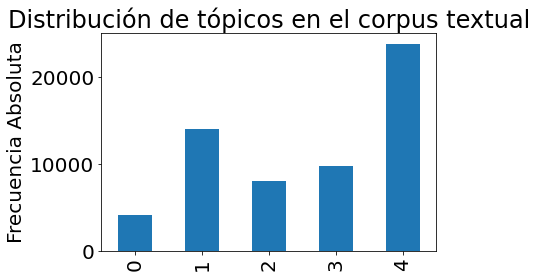

In [ ]:

ax=df_model["topic_dominant"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

In [ ]:
# To plot topic importance with the correct index (starting in 1 instead of 0)
ax=df_model["topic_dominant"].value_counts().sort_index()
ax = pd.DataFrame(ax)
ax.insert(1, 'Topico', [1,2,3,4,5], True)
ax


topic_dominant  Topico
0            4089       1
1           14020       2
2            8089       3
3            9778       4
4           23839       5

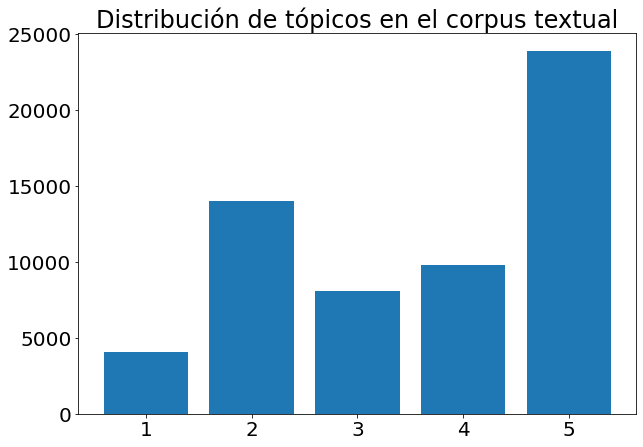

In [ ]:
# Plot topic distribution 
x_axis = ax['Topico']
y_axis = ax['topic_dominant']
plt.figure(figsize=(10,7))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, x_axis)
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

# Bigramas por tópico

In [ ]:
## Obtain the bigrams for each topic
topic_1 = df_model[df_model['topic_dominant']==0] 
dft=topic_1['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi_1= dict(zip(names_bi, freqs_bi))
# We will then obtain the first 30 most popular words in the TF-IDF####
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi_1.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

battery life 39.18278008441563
sd card 35.298537181796256
fingerprint reader 27.709988222096772
meet expectation 25.646869990039697
finger print 21.482560855526405
64 gb 20.646602800968207
good price 18.636273146399827
good quality 17.512472237605753
good device 16.73141931227052
headphone jack 16.606486003155446


Text(0.5, 1.0, 'Bigramas más relevantes en el tópico 1')

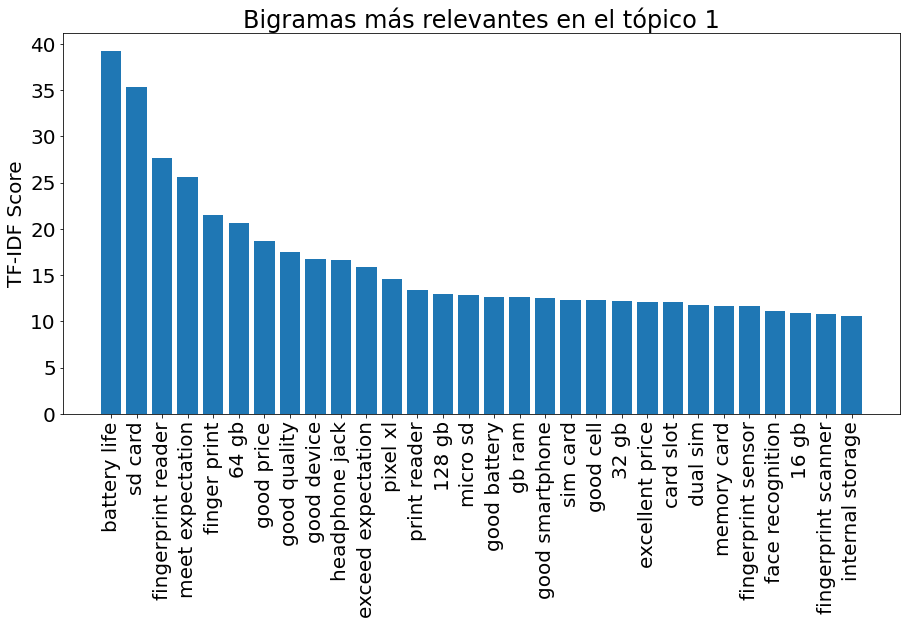

In [ ]:
results_sorted_bi_1=sorted(result_bi_1.items(), key = itemgetter(1), reverse = True)
df_results_bi_1=pd.DataFrame.from_dict(results_sorted_bi_1).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi_1[0],df_results_bi_1[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes en el tópico 1')

In [ ]:
topic_2 = df_model[df_model['topic_dominant']==1] 
dft=topic_2['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(topic_2['lemmas'].values.astype('U'))

names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi_2= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi_2.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

battery life 217.27495354247282
great price 158.35876141782893
good price 126.55838359519083
great camera 66.6982636772913
good quality 62.52695653886109
great great 58.736493771716184
work great 58.34181576262116
good battery 58.30555615451667
great battery 56.64264439287321
good camera 52.80416125205629


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 2')

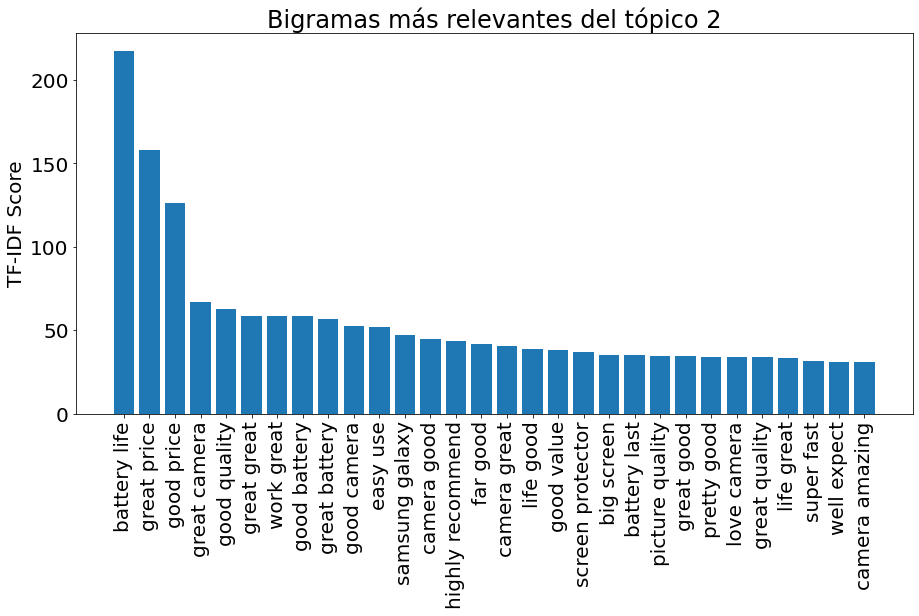

In [ ]:
results_sorted_bi_2=sorted(result_bi_2.items(), key = itemgetter(1), reverse = True)
df_results_bi_2=pd.DataFrame.from_dict(results_sorted_bi_2).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi_2[0],df_results_bi_2[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 2')

In [ ]:
topic_3 = df_model[df_model['topic_dominant']==2] 
dft=topic_3['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

easy use 74.90579177933202
battery life 50.649548501151514
work great 25.59294428762659
windows phone 21.309911493535388
text message 19.744233121062667
lumia 920 17.57514649483746
sd card 17.450790721344873
touch screen 17.069162492771817
sim card 16.83657140566746
easy set 16.43789249590697


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 3')

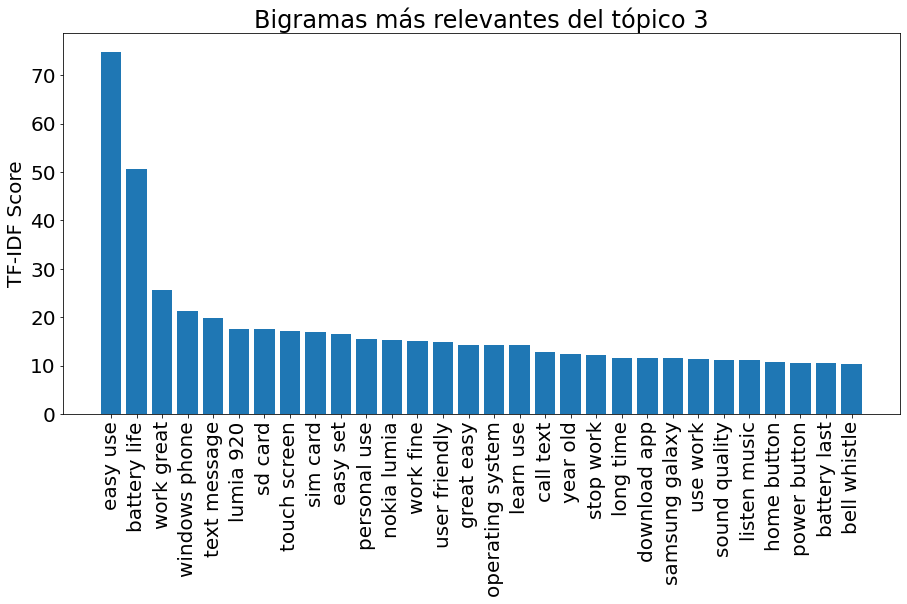

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 3')

In [ ]:
topic_4 = df_model[df_model['topic_dominant']==3] 
dft=topic_4['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

sim card 166.81747533783232
work verizon 52.10610463238631
work great 50.69082745373472
straight talk 41.61759065213173
customer service 37.2128129200651
work fine 33.69536667236916
dual sim 33.12260089004631
sd card 28.928470210830106
work perfectly 27.699997717652703
card work 26.602774893463273


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 4')

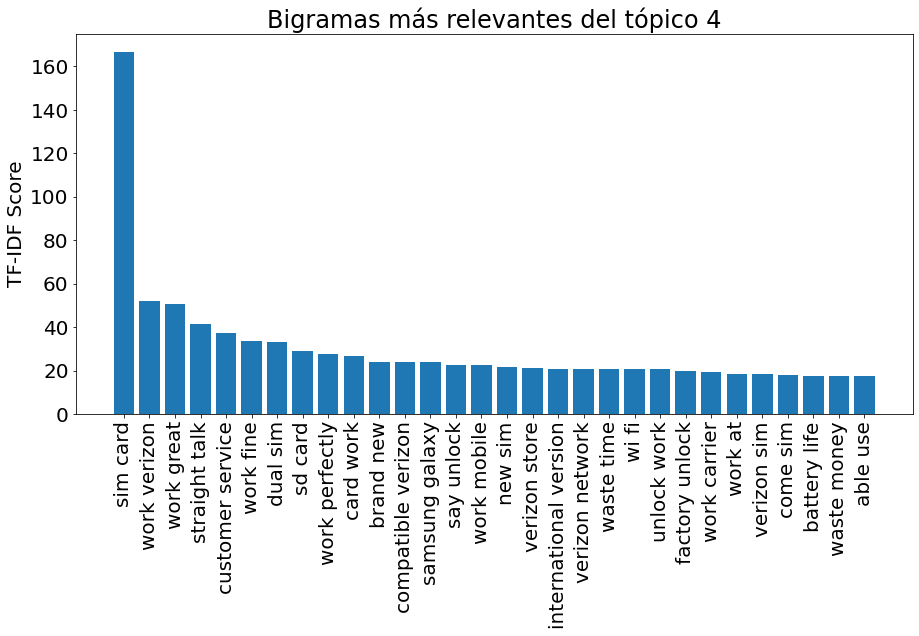

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 4')

In [ ]:
topic_5 = df_model[df_model['topic_dominant']==4] 
dft=topic_5['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

work great 407.3158541667726
brand new 221.56941411148946
work perfectly 152.28827737628146
good product 151.60001230597575
battery life 146.88765967928046
great product 125.17021999714919
work fine 104.60834912417621
great condition 101.37681437997742
stop work 96.84817029119635
perfect condition 94.96216672142663


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 5')

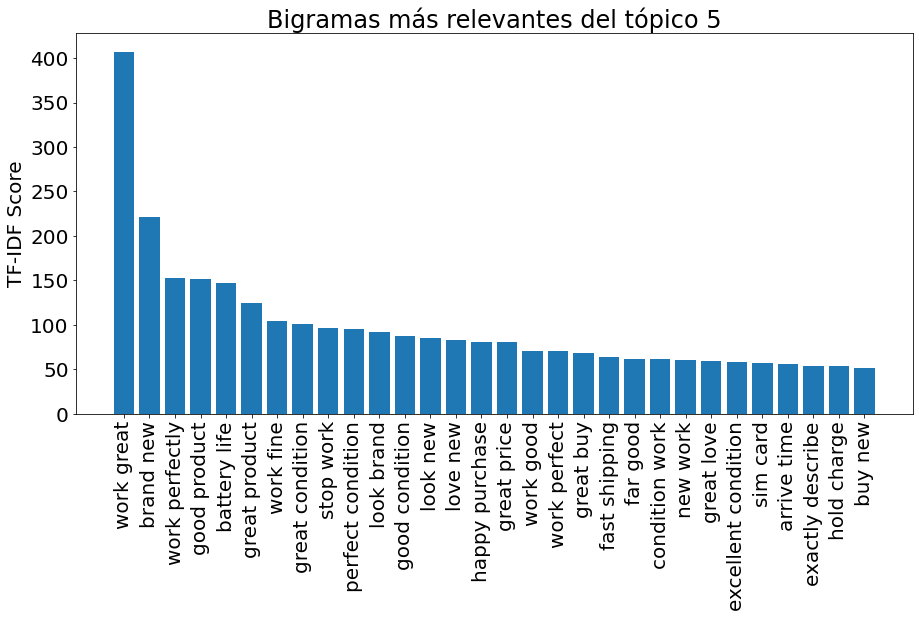

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 5')

In [ ]:
topic_6 = df_model[df_model['topic_dominant']==5] 
dft=topic_6['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

battery life 214.93746954336814
good price 138.29702700587018
good quality 70.78009139002475
good battery 65.57599314524938
great battery 58.506682680634135
far good 47.26283560510381
great price 46.24016650874702
good camera 44.6743141818637
life good 42.054916416005746
good value 41.998903394693286


# Trigramas por tópico


In [ ]:
## Obtain the trigrams for each topic
topic_1 = df_model[df_model['topic_dominant']==0] 
dft=topic_1['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

finger print reader 12.986101044679302
sd card slot 8.645465100553757
micro sd card 8.19823433240975
good battery life 7.558906547316259
battery life good 5.83721288005252
gb sd card 5.380213008251532
great battery life 4.617918489339196
finger print sensor 4.211777074346733
64 gb sd 3.9341810578172947
long battery life 3.903481214158817


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 1')

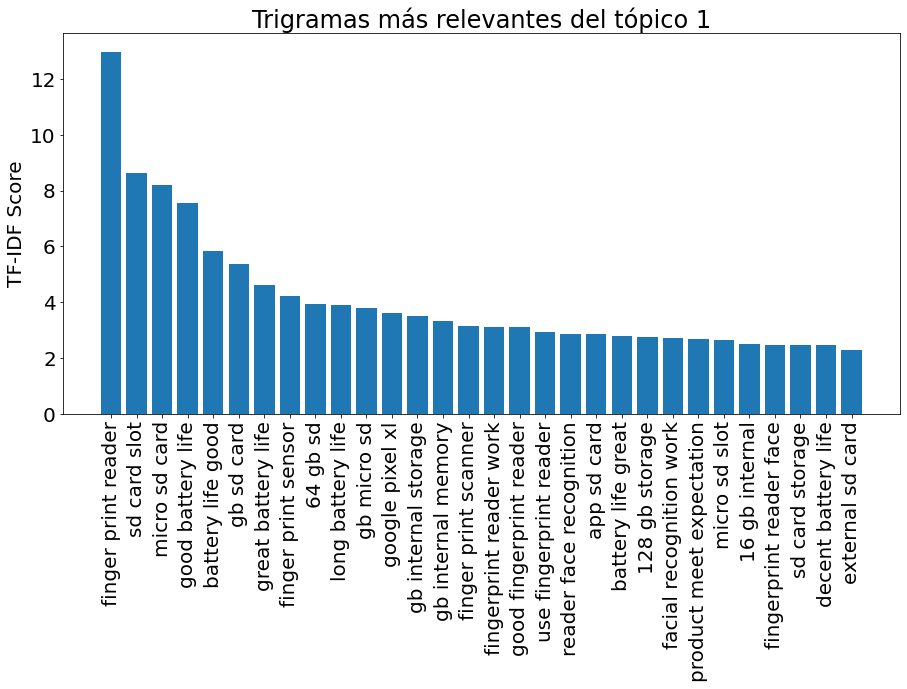

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 1')

In [ ]:
topic_2 = df_model[df_model['topic_dominant']==1] 
dft=topic_2['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(topic_2['lemmas'].values.astype('U'))
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

great great price 47.062735685943395
good battery life 41.68115838060113
great battery life 38.185832815096354
battery life good 35.54387112703753
battery life great 29.47770873187609
long battery life 22.728713650337095
battery last day 16.9344863013602
battery life amazing 15.925371737158018
good value money 14.514495015869931
battery life well 13.714069922404855


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 2')

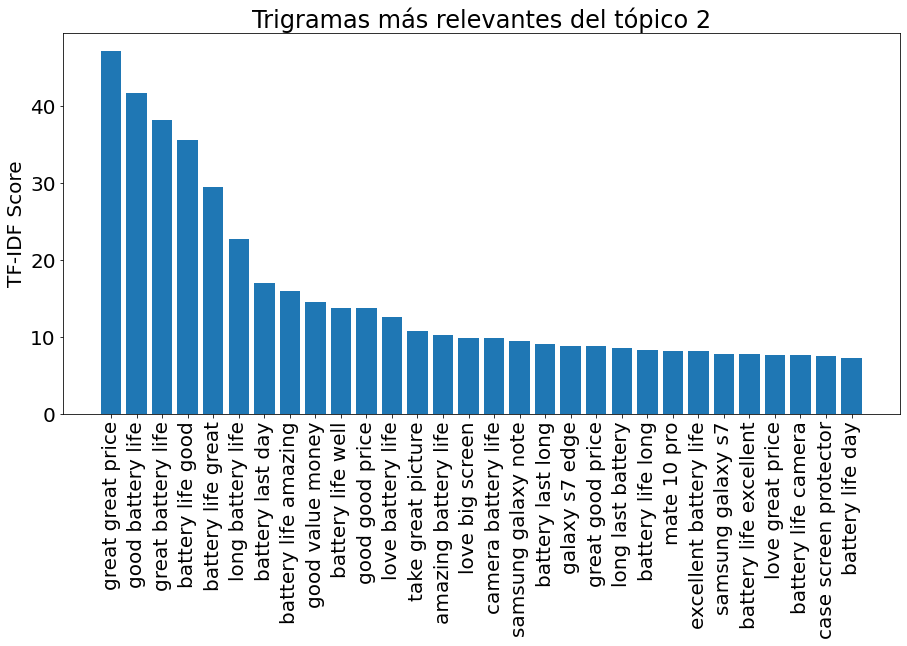

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 2')

In [ ]:
topic_3 = df_model[df_model['topic_dominant']==2] 
dft=topic_3['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

great easy use 12.216751902436588
battery life good 6.490147219777207
great battery life 6.106824901646901
love easy use 5.782563768171954
long battery life 5.242023579603575
good battery life 5.118736241737143
easy use work 4.857558851751406
battery life great 4.7148457550195815
nokia lumia 920 4.698610008677782
battery last day 4.173386997525105


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 3')

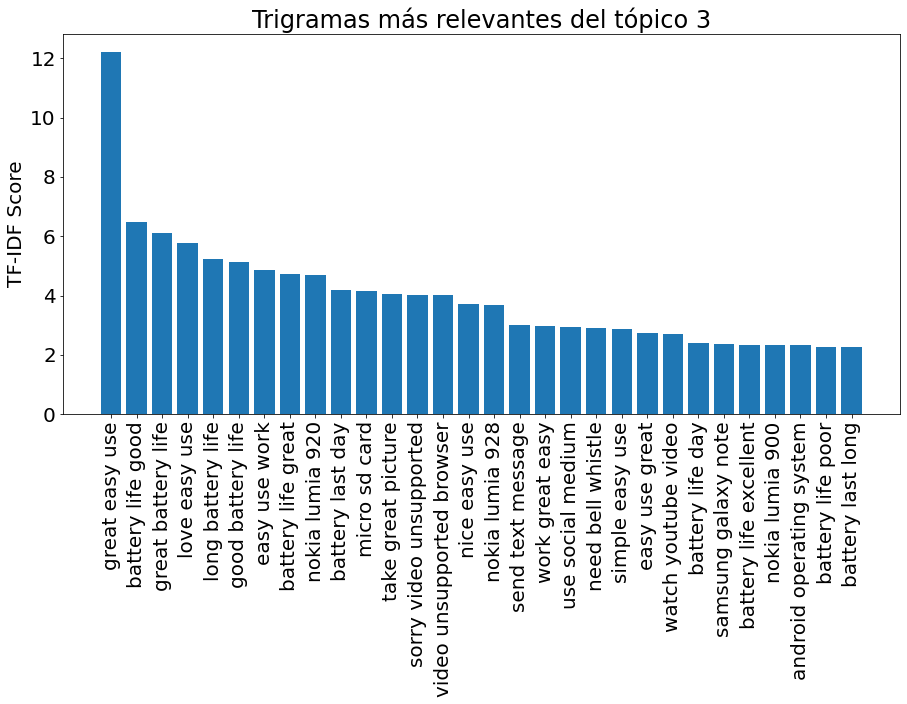

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 3')

In [ ]:
topic_4 = df_model[df_model['topic_dominant']==3] 
dft=topic_4['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

sim card work 22.98072889895974
come sim card 16.78499021145559
new sim card 15.962039708369607
verizon sim card 12.694588614926928
work straight talk 10.612707029524849
use sim card 10.485839591653676
read sim card 8.833427768260224
work verizon network 8.718897114532377
mobile sim card 8.500494230696404
insert sim card 8.31548980766108


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 4')

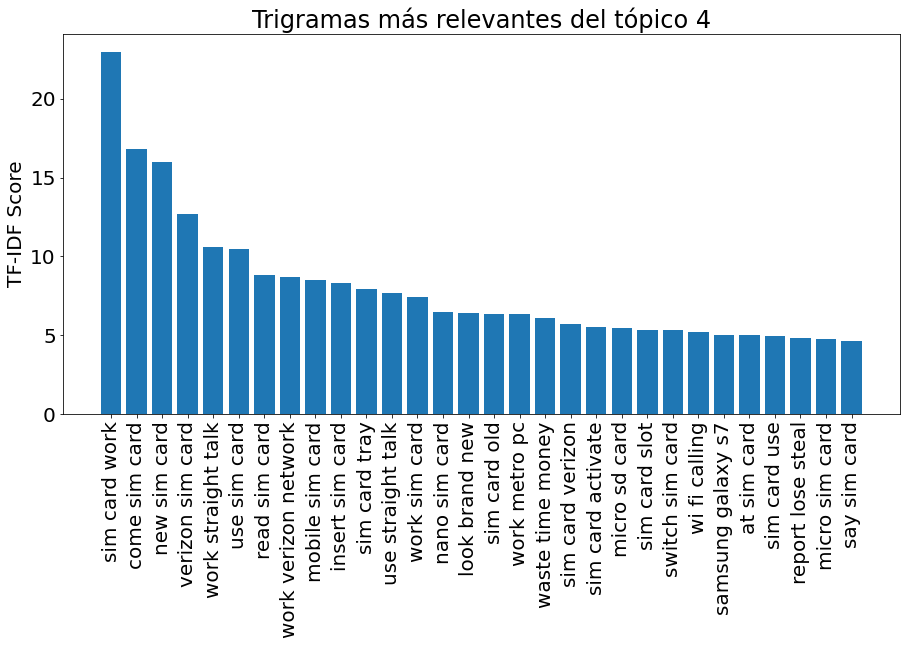

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 4')

In [ ]:
topic_5 = df_model[df_model['topic_dominant']==4] 
dft=topic_5['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

look brand new 82.23872793346246
brand new work 27.263941012682775
love work great 26.01926170390673
stop work month 24.97406077746395
work great far 23.790026603603767
new work great 23.337495526256046
battery hold charge 19.444164799137397
work brand new 19.363164180090937
work great problem 18.91959501668689
condition work great 18.75638627823002


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 5')

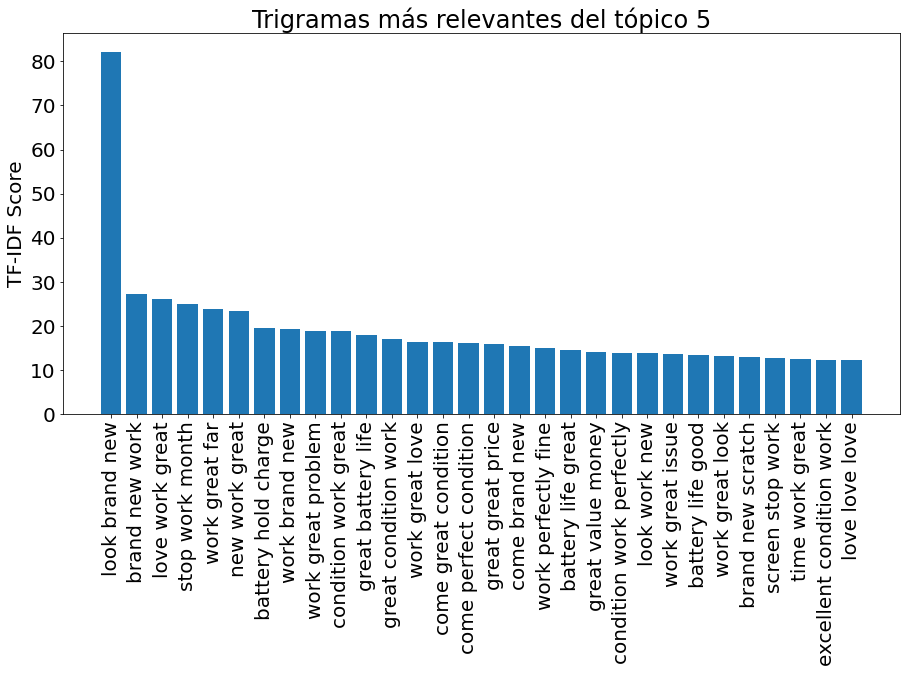

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 5')

# Análisis de Sentimientos


In [ ]:
# Load data
df_sentiment = pd.read_csv('Electronics_complete_2.csv', index_col=False)
df_topics=pd.read_csv('topic_model_results_el_5topics.csv', index_col=False)

In [ ]:
df_sentiment ['cleaned_text']=df_sentiment['body']
df_sentiment

Unnamed: 0        asin               name  rating                date  \
0               0  B0000SX2UC              Janet       3    October 11, 2005   
1               1  B0000SX2UC         Luke Wyatt       1     January 7, 2004   
2               2  B0000SX2UC             Brooke       5   December 30, 2003   
3               3  B0000SX2UC      amy m. teague       3      March 18, 2004   
4               4  B0000SX2UC      tristazbimmer       4     August 28, 2005   
...           ...         ...                ...     ...                 ...   
59810       67981  B081H6STQQ              jande       5     August 16, 2019   
59811       67982  B081H6STQQ            2cool4u       5  September 14, 2019   
59812       67983  B081H6STQQ              simon       5       July 14, 2019   
59813       67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019   
59814       67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019   

       verified                                              title  \
0         False                        Def not best, but not worst   
1         False                        Text Messaging Doesn't Work   
2         False                                    Love This Phone   
3         False                            Love the Phone, BUT...!   
4         False       Great phone service and options, lousy case!   
...         ...                                                ...   
59810     False  Awesome Phone, but finger scanner is a big mis...   
59811     False                                    Simply Amazing!   
59812     False  great phon3, but many bugs need to fix. still ...   
59813      True                                  Phone is like new   
59814     False                    Outstanding phone for the price   

                                                    body  helpfulVotes  \
0      I had the Samsung A600 for awhile which is abs...           1.0   
1      Due to a software issue between Nokia and Spri...          17.0   
2      This is a great, reliable phone. I also purcha...           5.0   
3      I love the phone and all, because I really did...           1.0   
4      The phone has been great for every purpose it ...           1.0   
...                                                  ...           ...   
59810  I love the camera on this phone. The screen is...           1.0   
59811  I've been an Xperia user for several years and...           1.0   
59812                         buy one more for my cousin           NaN   
59813  Product looks and works like new. Very much re...           NaN   
59814  I love the size and style of this phone. It is...           NaN   

                                                  review  Numero de palabras  \
0      I had the Samsung A600 for awhile which is abs...                 327   
1      Due to a software issue between Nokia and Spri...                 129   
2      This is a great, reliable phone. I also purcha...                 131   
3      I love the phone and all, because I really did...                 107   
4      The phone has been great for every purpose it ...                 128   
...                                                  ...                 ...   
59810  I love the camera on this phone. The screen is...                 127   
59811  I've been an Xperia user for several years and...                 102   
59812                         buy one more for my cousin                   6   
59813  Product looks and works like new. Very much re...                   9   
59814  I love the size and style of this phone. It is...                  29   

                                                  lemmas  \
0      samsung a600 awhile absolute doo doo read revi...   
1      software issue nokia sprint text messaging cap...   
2      great reliable purchase samsung a460 die menu ...   
3      love need expect price bill receive little mon...   
4      great purpose offer day buy case case picture ..

In [ ]:
# Select the colums needed from the dataset
df_topics= df_topics.iloc[:,[1,2,3,4]]
df_topics

lemmas  \
0      samsung a600 awhile absolute doo doo read revi...   
1      software issue nokia sprint text messaging cap...   
2      great reliable purchase samsung a460 die menu ...   
3      love need expect price bill receive little mon...   
4      great purpose offer day buy case case picture ...   
...                                                  ...   
59810  love camera screen huge 4k color vibrant proce...   
59811  xperia user year sony come long way ugly notch...   
59812                                         buy cousin   
59813                    product look work new recommend   
59814  love size style great size great feature good ...   

                                                  tokens  \
0      ['samsung', 'a600', 'awhile', 'absolute', 'doo...   
1      ['software', 'issue', 'nokia', 'sprint', 'text...   
2      ['great', 'reliable', 'purchase', 'samsung', '...   
3      ['love', 'need', 'expect', 'price', 'bill', 'r...   
4      ['great', 'purpose', 'offer', 'day', 'buy', 'c...   
...                                                  ...   
59810  ['love', 'camera', 'screen', 'huge', '4k', 'co...   
59811  ['xperia', 'user', 'year', 'sony', 'come', 'lo...   
59812                                  ['buy', 'cousin']   
59813    ['product', 'look', 'work', 'new', 'recommend']   
59814  ['love', 'size', 'style', 'great', 'size', 'gr...   

                                            lda_features  topic_dominant  
0      [0.00159354 0.06091623 0.68508899 0.02022937 0...               2  
1      [0.05393516 0.0034369  0.38649106 0.55264103 0...               3  
2      [0.21853487 0.00374956 0.77024424 0.00371781 0...               2  
3      [0.00753302 0.00753436 0.0076066  0.25854313 0...               4  
4      [0.00551653 0.29955438 0.26550019 0.0375966  0...               4  
...                                                  ...             ...  
59810  [0.00457808 0.74634737 0.12748185 0.11701604 0...               1  
59811  [0.1487989  0.83701938 0.00474025 0.00471009 0...               1  
59812  [0.0667562  0.06695618 0.06690564 0.06719406 0...               4  
59813  [0.0334403  0.03373888 0.03350496 0.03367447 0...               4  
59814  [0.02034223 0.91909724 0.02021502 0.0200654  0...               1  

[59815 rows x 4 columns]

In [ ]:
df_sentiment['lda_features'] = df_topics['lda_features']
df_sentiment['topic_dominant'] = df_topics['topic_dominant']
df_sentiment['cleaned_text']

0        I had the Samsung A600 for awhile which is abs...
1        Due to a software issue between Nokia and Spri...
2        This is a great, reliable phone. I also purcha...
3        I love the phone and all, because I really did...
4        The phone has been great for every purpose it ...
                               ...                        
59810    I love the camera on this phone. The screen is...
59811    I've been an Xperia user for several years and...
59812                           buy one more for my cousin
59813    Product looks and works like new. Very much re...
59814    I love the size and style of this phone. It is...
Name: cleaned_text, Length: 59815, dtype: object

In [ ]:
df_topics_complete=df_sentiment

In [ ]:
# Tokenize the data
def tokenize(text):
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    return tokens
df_topics_complete ['tokens'] = df_topics_complete['cleaned_text'].apply(tokenize)
print(df_topics_complete.head())

   Unnamed: 0        asin           name  rating               date  verified  \
0           0  B0000SX2UC          Janet       3   October 11, 2005     False   
1           1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2           2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3           3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4           4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  \
0  I had the Samsung A600 for awhile which is abs...           1.0   
1  Due to a software issue between Nokia and Spri...          17.0

In [ ]:
# Funtion to analyze the score
def tweet_scores(data_frame): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores


In [ ]:
# Apply the previous function to our data
df_topics_complete['scores']=tweet_scores(df_topics_complete['cleaned_text'])

In [ ]:
# Make sure all date type data is in the same format 
df_topics_complete['date_2'] = df_sentiment['date'].astype('datetime64[ns]')

In [ ]:
df_topics_complete

Unnamed: 0        asin               name  rating                date  \
0               0  B0000SX2UC              Janet       3    October 11, 2005   
1               1  B0000SX2UC         Luke Wyatt       1     January 7, 2004   
2               2  B0000SX2UC             Brooke       5   December 30, 2003   
3               3  B0000SX2UC      amy m. teague       3      March 18, 2004   
4               4  B0000SX2UC      tristazbimmer       4     August 28, 2005   
...           ...         ...                ...     ...                 ...   
59810       67981  B081H6STQQ              jande       5     August 16, 2019   
59811       67982  B081H6STQQ            2cool4u       5  September 14, 2019   
59812       67983  B081H6STQQ              simon       5       July 14, 2019   
59813       67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019   
59814       67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019   

       verified                                              title  \
0         False                        Def not best, but not worst   
1         False                        Text Messaging Doesn't Work   
2         False                                    Love This Phone   
3         False                            Love the Phone, BUT...!   
4         False       Great phone service and options, lousy case!   
...         ...                                                ...   
59810     False  Awesome Phone, but finger scanner is a big mis...   
59811     False                                    Simply Amazing!   
59812     False  great phon3, but many bugs need to fix. still ...   
59813      True                                  Phone is like new   
59814     False                    Outstanding phone for the price   

                                                    body  helpfulVotes  \
0      I had the Samsung A600 for awhile which is abs...           1.0   
1      Due to a software issue between Nokia and Spri...          17.0   
2      This is a great, reliable phone. I also purcha...           5.0   
3      I love the phone and all, because I really did...           1.0   
4      The phone has been great for every purpose it ...           1.0   
...                                                  ...           ...   
59810  I love the camera on this phone. The screen is...           1.0   
59811  I've been an Xperia user for several years and...           1.0   
59812                         buy one more for my cousin           NaN   
59813  Product looks and works like new. Very much re...           NaN   
59814  I love the size and style of this phone. It is...           NaN   

                                                  review  Numero de palabras  \
0      I had the Samsung A600 for awhile which is abs...                 327   
1      Due to a software issue between Nokia and Spri...                 129   
2      This is a great, reliable phone. I also purcha...                 131   
3      I love the phone and all, because I really did...                 107   
4      The phone has been great for every purpose it ...                 128   
...                                                  ...                 ...   
59810  I love the camera on this phone. The screen is...                 127   
59811  I've been an Xperia user for several years and...                 102   
59812                         buy one more for my cousin                   6   
59813  Product looks and works like new. Very much re...                   9   
59814  I love the size and style of this phone. It is...                  29   

                                                  lemmas  \
0      samsung a600 awhile absolute doo doo read revi...   
1      software issue nokia sprint text messaging cap...   
2      great reliable purchase samsung a460 die menu ...   
3      love need expect price bill receive little mon...   
4      great purpose offer day buy case case picture ..

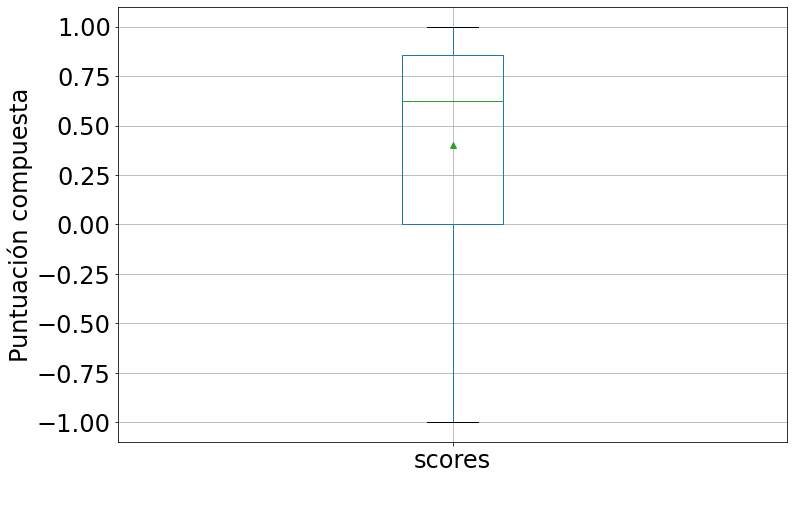

In [ ]:
# Boxplot of the compound score obtained
ax1 = df_topics_complete.boxplot(column='scores', figsize=(12,8), showmeans=True, showfliers=False, fontsize=24) #~eliminando outliers
ax1.set_ylabel('Puntuación compuesta', fontsize=24)
ax1.set_xlabel(' ', fontsize=24)
plt.show() 

In [ ]:
# Group the scores per date
df_bygroup=pd.DataFrame(df_topics_complete.groupby(['date_2'])['scores'].agg('sum'))

In [ ]:
# Index and save the data
df_bygroup['date']=df_bygroup.index

df_bygroup.to_csv('Electronics_SA_dates.csv')
df_bygroup

scores       date
date_2                        
2003-11-24   0.8953 2003-11-24
2003-12-30   0.8966 2003-12-30
2004-01-07   0.8720 2004-01-07
2004-02-02   0.6486 2004-02-02
2004-03-18   0.9592 2004-03-18
...             ...        ...
2019-12-21  49.9257 2019-12-21
2019-12-22  58.6485 2019-12-22
2019-12-23  60.1420 2019-12-23
2019-12-24  51.6723 2019-12-24
2019-12-25  -1.0268 2019-12-25

[2982 rows x 2 columns]

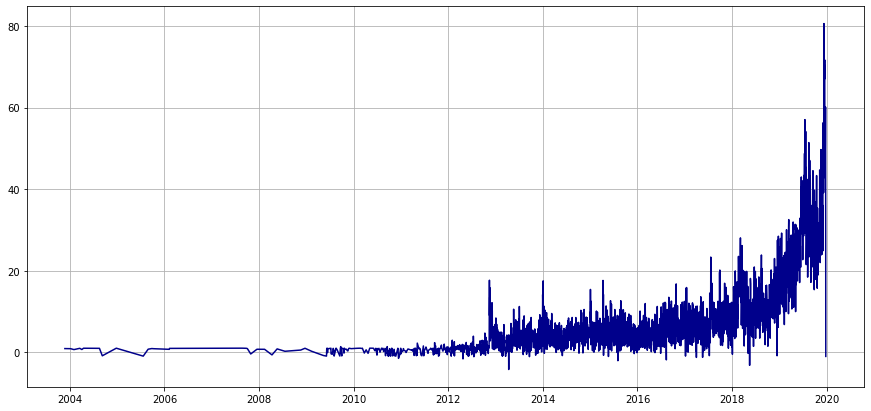

In [ ]:
# Show sentiment evolution
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

plt.grid()
plt.show()

In [ ]:
# Describe the compound score data
df_topics_complete['scores'].describe()

count    59815.000000
mean         0.402053
std          0.550225
min         -0.999100
25%          0.000000
50%          0.624900
75%          0.856100
max          1.000000
Name: scores, dtype: float64

# Gráficos por tópico


In [ ]:
# Obtain the evolution of the sentiment through the years for each topic
topic_1_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==0] 
topic_1_sentiment = topic_1_sentiment[topic_1_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_1_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Electronics_dates_1.csv')
df_bygroup

scores       date
date_2                        
2004-04-03   0.6705 2004-04-03
2009-10-02   0.9977 2009-10-02
2010-09-13   0.7917 2010-09-13
2011-10-16   0.5849 2011-10-16
2011-10-26   0.8902 2011-10-26
...             ...        ...
2019-12-21   8.9686 2019-12-21
2019-12-22  11.5339 2019-12-22
2019-12-23   8.9611 2019-12-23
2019-12-24   2.8759 2019-12-24
2019-12-25  -0.6249 2019-12-25

[1494 rows x 2 columns]

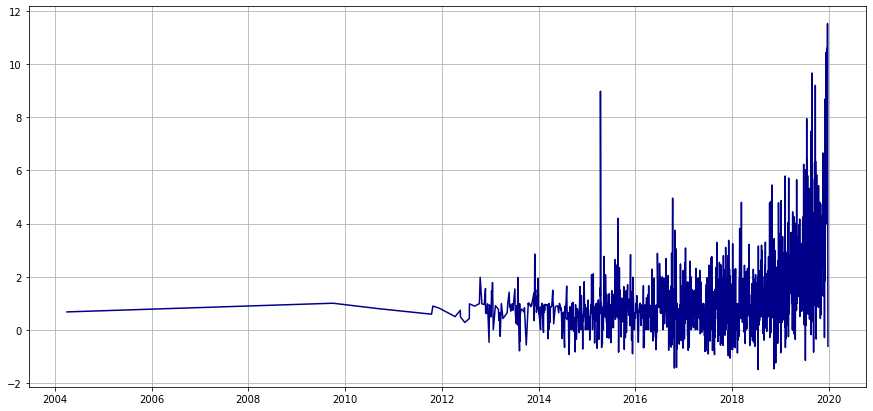

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
topic_2_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==1] 
topic_2_sentiment = topic_2_sentiment[topic_2_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_2_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Electronics_dates_2.csv')
df_bygroup

scores       date
date_2                        
2003-11-24   0.8953 2003-11-24
2007-09-25   0.9652 2007-09-25
2009-08-02   0.3825 2009-08-02
2009-08-16   0.8083 2009-08-16
2009-11-05   0.7553 2009-11-05
...             ...        ...
2019-12-20  31.6469 2019-12-20
2019-12-21  20.1867 2019-12-21
2019-12-22  22.2975 2019-12-22
2019-12-23  21.5864 2019-12-23
2019-12-24  26.3792 2019-12-24

[2306 rows x 2 columns]

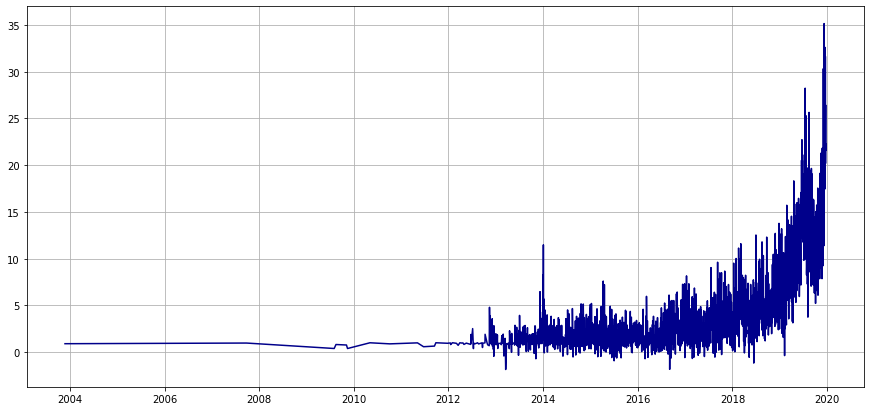

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
topic_3_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==2] 
topic_3_sentiment = topic_3_sentiment[topic_3_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_3_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Electronics_dates_3.csv')
df_bygroup

scores       date
date_2                       
2003-12-30  0.8966 2003-12-30
2004-02-02  0.6486 2004-02-02
2004-04-16  0.9805 2004-04-16
2004-08-17  0.9556 2004-08-17
2004-09-08 -0.8729 2004-09-08
...            ...        ...
2019-12-20 -0.0744 2019-12-20
2019-12-21 -0.3234 2019-12-21
2019-12-22  2.4411 2019-12-22
2019-12-23  3.6293 2019-12-23
2019-12-24  4.6485 2019-12-24

[2571 rows x 2 columns]

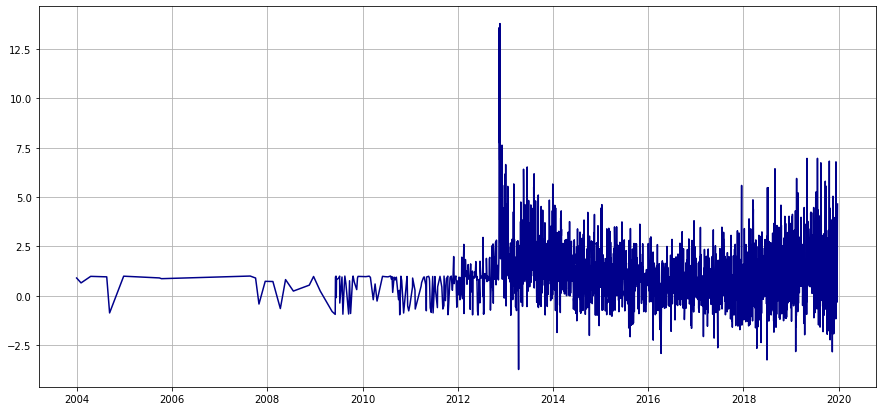

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
topic_4_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==3] 
topic_4_sentiment = topic_4_sentiment[topic_4_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_4_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Electronics_dates_4.csv')
df_bygroup

scores       date
date_2                       
2004-01-07  0.8720 2004-01-07
2005-07-21 -0.9542 2005-07-21
2009-06-27  0.9370 2009-06-27
2009-09-23  0.6216 2009-09-23
2009-10-18 -0.2144 2009-10-18
...            ...        ...
2019-12-21  7.1175 2019-12-21
2019-12-22  0.6772 2019-12-22
2019-12-23 -1.9453 2019-12-23
2019-12-24  1.3421 2019-12-24
2019-12-25 -0.4019 2019-12-25

[2226 rows x 2 columns]

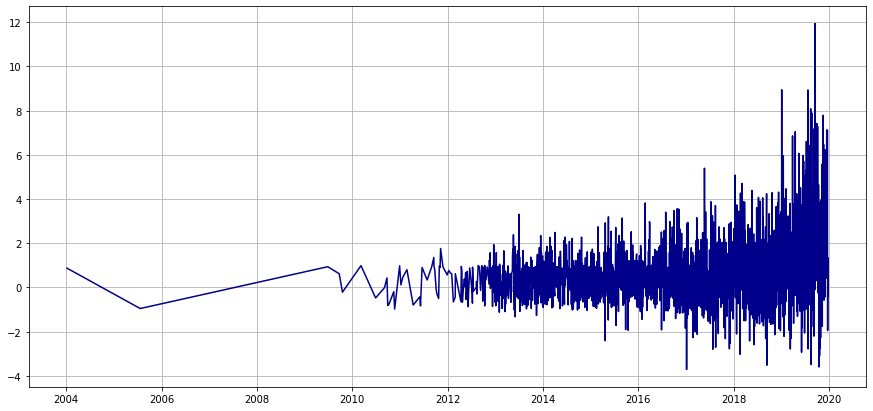

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
topic_5_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==4] 
topic_5_sentiment = topic_5_sentiment[topic_5_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_5_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Electronics_dates_5.csv')
df_bygroup

scores       date
date_2                        
2004-03-18   0.9592 2004-03-18
2005-08-28   0.7432 2005-08-28
2006-02-07   0.7147 2006-02-07
2006-02-09   0.9419 2006-02-09
2009-07-19  -0.5127 2009-07-19
...             ...        ...
2019-12-20   9.6381 2019-12-20
2019-12-21  13.9763 2019-12-21
2019-12-22  21.6988 2019-12-22
2019-12-23  27.9105 2019-12-23
2019-12-24  16.4266 2019-12-24

[2501 rows x 2 columns]

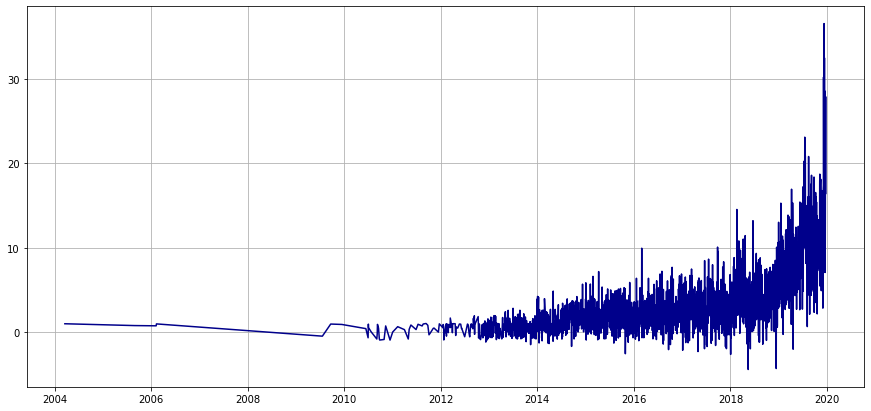

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()